**Введите ваше ФИО**

In [ ]:
Есмуханов Арман Еркинович

# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение объектов, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

Привейт, команды:
1 - отображение астрономической картинки дня,
2 - фотографии с марсохода,
3 - объекты, сближающиеся с Землей,
4 - данные о космической погоде,
5 - остановка программы.
Введите номер команды 2
Дата должна быть введене в формате ГГГГ-ММ-ДД
введите камеру марсохода: fhaz
введите марсианский день: 3000
введите тип марсохода: spirit


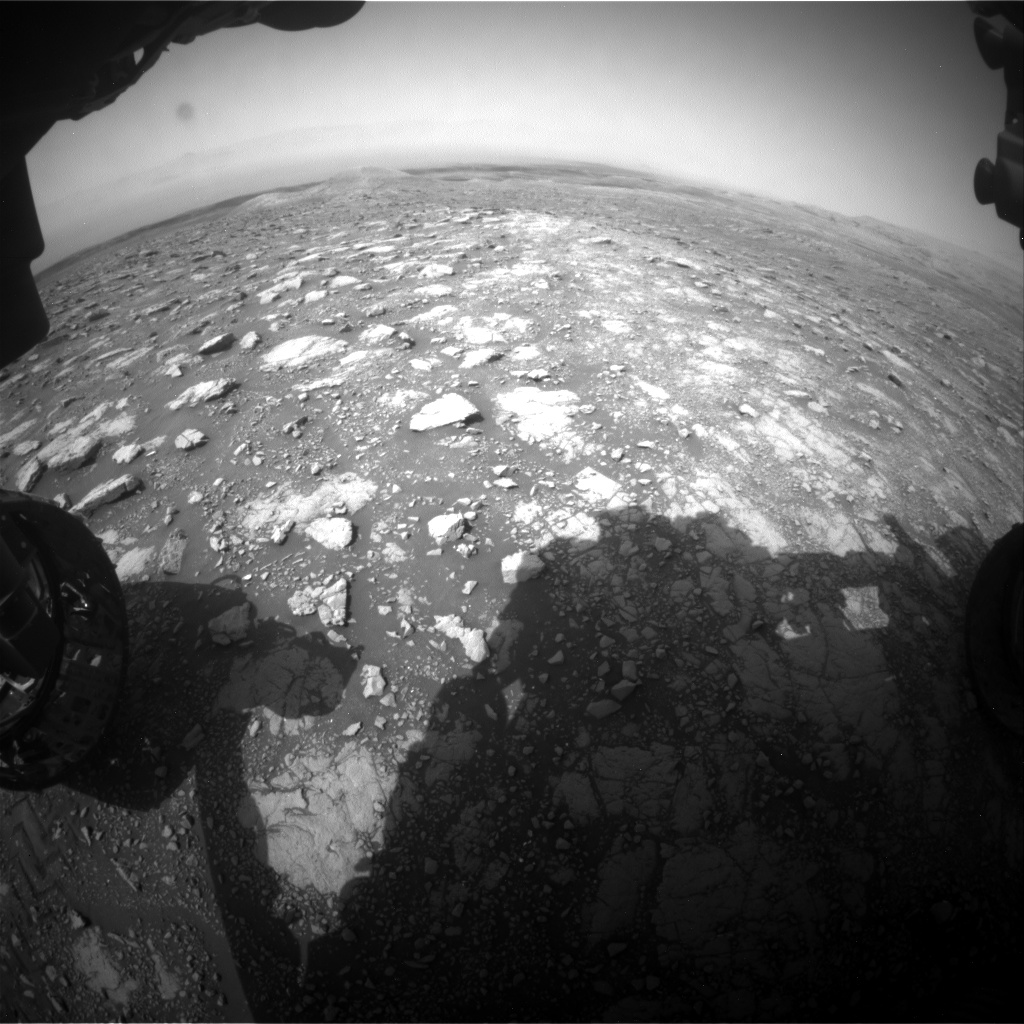

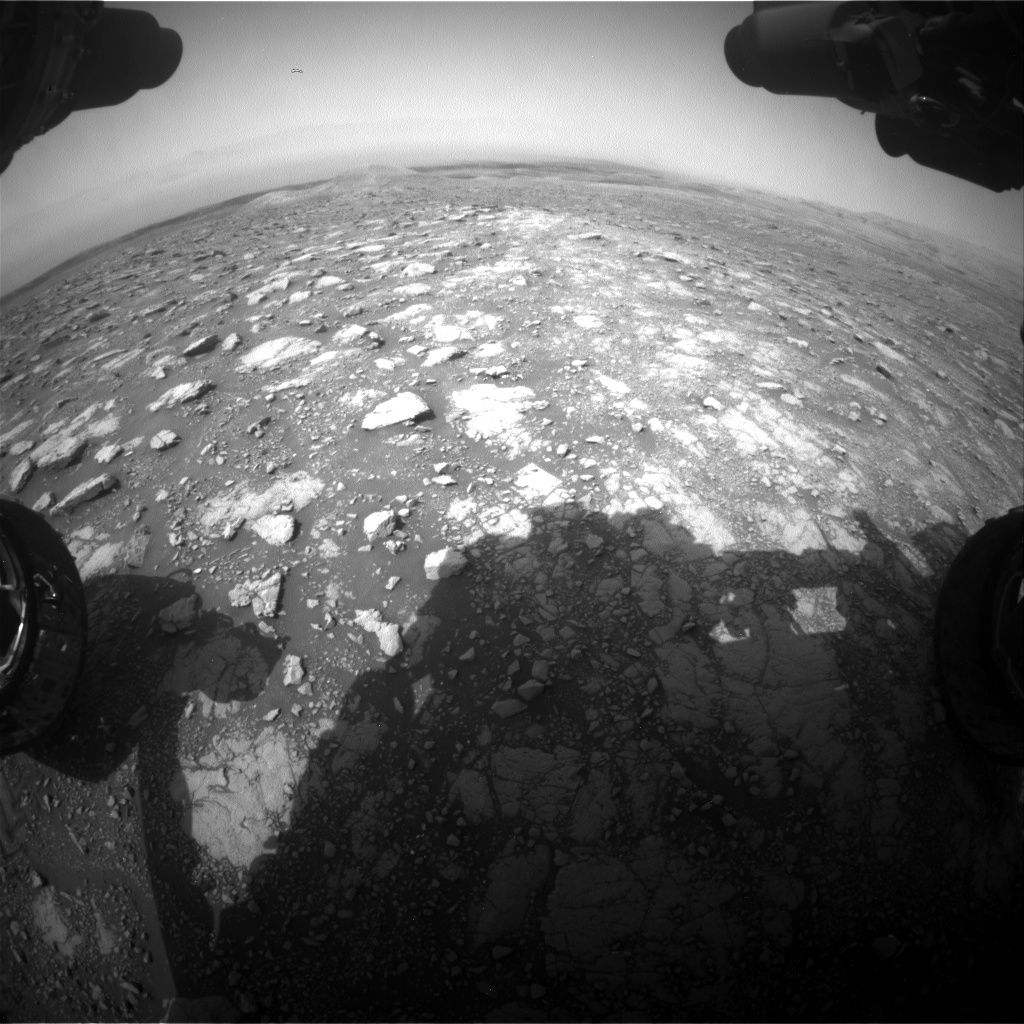

Привейт, команды:
1 - отображение астрономической картинки дня,
2 - фотографии с марсохода,
3 - объекты, сближающиеся с Землей,
4 - данные о космической погоде,
5 - остановка программы.
Введите номер команды 3
Астероид (2008 NP3): ожидаемый диаметр (в метрах) - 116.82683651714999, потенциально не опасен
Астероид (2008 WY32): ожидаемый диаметр (в метрах) - 136.00116132335, потенциально не опасен
Астероид (2011 UY255): ожидаемый диаметр (в метрах) - 110.03798191025, потенциально не опасен
Астероид (2014 WY120): ожидаемый диаметр (в метрах) - 147.75514650335, потенциально не опасен
Астероид (2016 LK10): ожидаемый диаметр (в метрах) - 50.529222629749995, потенциально не опасен
Астероид (2019 DJ1): ожидаемый диаметр (в метрах) - 18.7733863058, потенциально не опасен
Астероид (2020 FP5): ожидаемый диаметр (в метрах) - 4.93790370995, потенциально не опасен
Астероид (2020 HF10): ожидаемый диаметр (в метрах) - 34.1619471798, потенциально не опасен
Астероид (2020 WD): ожидаемый диаметр (в метрах

KeyboardInterrupt: Interrupted by user

In [ ]:
import requests as rq
from PIL import Image
from IPython.display import display
import io
import datetime


url='https://api.nasa.gov/'
token='Mo3CuXbamVuQQ5zy6pQCMN9PhnRkOpdcJuHEif5o'


def get_apod():
  apod_url=url+f'planetary/apod?api_key={token}'
  try:
    response=rq.get(apod_url).json()
  except:
    print('чтото пошло не так извините')
  res_image=rq.get(response['url'])
  image=Image.open(io.BytesIO(res_image.content))

  return (display(image), response['explanation'])


def get_mars_rover_photos():
  print('Дата должна быть введене в формате ГГГГ-ММ-ДД')

  camera=input('введите камеру марсохода: ')
  date=int(input("введите марсианский день: "))
  rover_type=input('введите тип марсохода: ')

  try:
    mars_url=f'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol={date}&camera={camera}&api_key={token}'
  except:
    print('введены некорректные или несовместимые данные, попробуйте снова')

  response=rq.get(mars_url).json()

  for img in response['photos']:
    res_image=rq.get(img['img_src'])
    image=Image.open(io.BytesIO(res_image.content))
    display(image)


def get_neo():
  date='2022-11-08'#input('')
  try:
    response=rq.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={date}&api_key={token}').json()['near_earth_objects'][date]
  except:
    print('упс, чтото пошло не так')
  ast_url=f'https://api.nasa.gov/neo/rest/v1/neo/3542519?api_key={token}'

  for asteroid in response:
    print(f'Астероид {asteroid["name"]}: ожидаемый диаметр (в метрах) - {sum(asteroid["estimated_diameter"]["meters"].values())/2}, потенциально {(1+asteroid["is_potentially_hazardous_asteroid"])*"не"} опасен')


def get_space_weather():
  params = {'api_key': token}
  try:
      response = rq.get('https://api.nasa.gov/DONKI/GST', params=params)
  except:
      print("ошибка при получении данных о космической погоде")
  for event in response.json():
      print(f"время события: {event['startTime']}, активность: {event['allKpIndex'][0]['kpIndex']}")



while True:
  print('Привейт, команды:\n1 - отображение астрономической картинки дня,\n2 - фотографии с марсохода,\n3 - объекты, сближающиеся с Землей,\n4 - данные о космической погоде,\n5 - остановка программы.')
  choice=int(input('Введите номер команды '))
  if choice == 1:
    get_apod()
  if choice == 2:
    get_mars_rover_photos()
  if choice == 3:
    get_neo()
  if choice == 4:
    get_space_weather()


# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
import requests

URL = 'https://api.artic.edu/api/v1/artworks'


def fetch_artworks(page=1):
    params = {'page': page}
    response = requests.get(URL, params=params).json()

    return response['data'], response['pagination']


def filter_by_artist(artworks, artist_name):
    filtered_artworks = []
    # return [art for art in artworks if artist_name.lower() in art['artist_title'].lower()]
    for art in artworks:
      if art['artist_title'] != None:
        if artist_name.lower() in art['artist_title'].lower():
          filtered_artworks.append(art)
    return filtered_artworks



def display_artwork_details(artwork):
    print(f'Название: {artwork["title"]}')
    print(f'Исполнитель: {artwork["artist_title"]}')
    print(f'Дата: {artwork["date_display"]}')
    print(f'Носитель: {artwork["medium_display"]}')


def main():
    page = 1
    while True:
        artworks, pagination = fetch_artworks(page)
        print('Список произведений искусства: ')

        for i, artwork in enumerate(artworks, start=1):
            print(f"{i}. {artwork['title']} ({artwork['artist_title']})")

        action= input('Введите f для фильтрации, n для следующей страницы, p для предыдущей, q для выхода: ')

        if action == 'f':
            artist_name = input('Введите имя художника для фильтрации: ')
            filtered_artworks = filter_by_artist(artworks, artist_name)
            for i, artwork in enumerate(filtered_artworks, start=1):
                print(f"{i}. {artwork['title']} ({artwork['artist_title']})")

        elif action == 'n':
          try:
            if pagination['next_url']:
              page += 1
          except:
            print('это посленяя страница')
        elif action == 'p':
            try:
              if pagination['prev_url']:
                page -= 1
            except:
                print('это первая страница')
        elif action =='q':
            break
        else:
            print('несуществующая команда, попытайтесь снова')

        artwork_number = int(input('введите номер проивзедения для подробной информации: '))
        if 1 <= artwork_number <= len(artworks):
            display_artwork_details(artworks[artwork_number - 1])
        else:
            print('неверный номер')

main()

Список произведений искусства: 
1. The Crucifixion (Francescuccio Ghissi)
2. Two Putti (Matteo di Giovanni)
3. Fragment from Christ Carrying the Cross: Saint John the Evangelist (Jean Hey, (the Master of Moulins))
4. Elements I (Nancy Hemenway Barton)
5. Untitled (Exquisite Corpse Drawing) (Evelyn Statsinger)
6. Untitled (Exquisite Corpse Drawing) (Evelyn Statsinger)
7. Untitled (Evelyn Statsinger)
8. Untitled (Evelyn Statsinger)
9. Untitled (Evelyn Statsinger)
10. Untitled (Evelyn Statsinger)
11. Untitled (Evelyn Statsinger)
12. Untitled (Evelyn Statsinger)
Введите f для фильтрации, n для следующей страницы, p для предыдущей, q для выхода: p
это первая страница
введите номер проивзедения для подробной информации: 4
Название: Elements I
Исполнитель: Nancy Hemenway Barton
Дата: 1978
Носитель: Lamb's wool, plain weave; appliquéd with mohair; plain weave with warp fringe; folded, molded, and tucked; embroidered with lamb's wool, alpaca, mohair, and karabul in buttonhole, chain, feather, r

KeyboardInterrupt: Interrupted by user

# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.


In [ ]:
import requests
from datetime import datetime

def get_price(crypto):
    url = f'https://api.coingecko.com/api/v3/simple/price?ids={crypto}&vs_currencies=usd&include_24hr_change=true'
    response = requests.get(url).json()
    return response


def add_crypto(portfolio, crypto, amount):
    portfolio[crypto] = amount


def calc_value(portfolio):
    total_value = 0
    for crypto, amount in portfolio.items():
        price_data = get_price(crypto)
        total_value += price_data[crypto]['usd']* amount
    return total_value


def track_changes(portfolio):
    changes = {}
    for crypto in portfolio.keys():
        price = get_price(crypto)
        changes[crypto] = price[crypto]['usd_24h_change']
    return changes


def historical_data_search(crypto):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto}/market_chart?vs_currency=usd&days=14'
    response = requests.get(url).json()
    return response


def display_portfolio(portfolio):
    for crypto, amount in portfolio.items():
        price = get_price(crypto)
        print(f'{crypto.upper()}: {amount}, нынешняя цена: {price[crypto]["usd"]}, изменение за 24 часа: {price[crypto]["usd_24h_change"]}')


def main():
    portfolio = {}
    while True:
        command = input('Введите одну команду из [добавить, посмотреть, отследить, исторические данные, выход]: ').lower()
        if command == "добавить":
            crypto = input("Введите название криптовалюты: ").lower()
            amount = float(input("Введите количество: "))
            try:
              add_crypto(portfolio, crypto, amount)
            except:
              print("такой крипты не существует, иди хомяка тапать")
        elif command == "посмотреть":
            print(f"общая стоимость портфеля: {calc_value(portfolio)}")
            display_portfolio(portfolio)

        elif command == "отследить":
            changes = track_changes(portfolio)
            for crypto, change in changes.items():
                print(f"{crypto.upper()} изменение за 24 часа: {change}%")

        elif command == "исторические данные":
            crypto = input("Введите название криптовалюты: ").lower()
            data = historical_data_search(crypto)
            for price in data['prices']:
                date = datetime.fromtimestamp(price[0] / 1000).strftime('%Y-%m-%d')
                print(f"дата: {date}, стоимость: {price[1]}")

        elif command == 'выход':
            break
        else:
            print('несуществующая команда')

main()

Введите одну команду из [добавить, посмотреть, отследить, исторические данные, выход]: добавить
Введите название криптовалюты: ZENEX
Введите количество: 100
Введите одну команду из [добавить, посмотреть, отследить, исторические данные, выход]: посмотреть
общая стоимость портфеля: 2.9645129999999997
ZENEX: 100.0, нынешняя цена: 0.02964513, 24h Change: 2.2734951217522537
Введите одну команду из [добавить, посмотреть, отследить, исторические данные, выход]: исторические данные
Введите название криптовалюты: ZENEX
дата: 2024-10-22, стоимость: 0.029891504181255767
дата: 2024-10-22, стоимость: 0.028997067725242683
дата: 2024-10-22, стоимость: 0.02921328298721678
дата: 2024-10-22, стоимость: 0.02918201812217164
дата: 2024-10-22, стоимость: 0.02928364178741822
дата: 2024-10-22, стоимость: 0.030080786003000223
дата: 2024-10-22, стоимость: 0.0296861449490998
дата: 2024-10-22, стоимость: 0.028882367533594064
дата: 2024-10-23, стоимость: 0.02907528572307342
дата: 2024-10-23, стоимость: 0.028921068

KeyError: 'etc'

# Задание 4

Задание 4: Проектное

Вам необходимо самостоятельно найти откртое API предоставляющее информацию в открытом доступе и реализовать собственный проект!


Критерии приемки результата:

- Проект включает в себя не менее 5 возможостей для пользователя
- Проект позволяет использовать все возможности проекта пользователю при помощи взаимодействия через коммандную строку
- Проект работает с открытым API (это значит что при проверке вашей работы преподавателем, преподавателю необходимо просто запустить ячейку с кодом вашего проекта и она будет работать без дополнительных манипуляции)
- Проект должен обязательно включать в себя ряд используемых конструкции:
    - Функции
    - Условные конструкции
    - Ввод/вывод
    - Словари/Списки
- Допускается использование библиотек:
    - requests
    - datetime
    - random

**Здесь добавьте описание вашего проекта**

In [ ]:
#  А здесь код